# 새로운 도서관은 2022-10-13일에 개관하였다. 개관 전후의 게시글 분석을 진행해보자. 

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [3]:
df = pd.read_csv('../data/everytime_crawling_all.csv')
df

,날짜,좋아요,내용
0,36분 전,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...
1,49분 전,0,학교 20분 거리면 닥 도서관 가서 공부?아님 안 씻고 집에서 공부?
2,2022-11-27 9:53,0,도서관 왔는데 오자마자 집 가고싶어지는거 어쩔... 왤케 힘이 없지
3,2022-11-26 17:00,109,학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함...
4,2022-11-26 15:56,5,종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해...
...,...,...,...
2393,2017-08-18 14:26,0,동덕다니는 애한테 학벌로 까이면 뭐라고 답해야 함?
2394,2017-05-02 12:40,1,"우리 고홍즈 하자,,, 나 동덕다니냐는 소리 지겨워ㅜㅜㅜ"
2395,2017-03-01 1:57,0,어이가없어서 잠도안와서 글쓰는데 ㅋㅋㅋㅋ내친구 동덕다니는데 오늘 연대애들이랑 3대 ...
2396,2017-01-29 19:55,2,아니 지가 15만원정도 되는 덕다운 추천해달래서누가 15만원으로 덕다운 살수 있는게...


In [4]:
df_sentiment = pd.read_csv('../data/everytime_crawling_sentiment.csv')
df_sentiment

,날짜,좋아요,내용,감정분석
0,36분 전,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...,positive
1,49분 전,0,학교 20분 거리면 닥 도서관 가서 공부?아님 안 씻고 집에서 공부?,neutral
2,2022-11-27 9:53,0,도서관 왔는데 오자마자 집 가고싶어지는거 어쩔... 왤케 힘이 없지,negative
3,2022-11-26 17:00,109,학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함...,positive
4,2022-11-26 15:56,5,종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해...,negative
...,...,...,...,...
2393,2017-08-18 14:26,0,동덕다니는 애한테 학벌로 까이면 뭐라고 답해야 함?,negative
2394,2017-05-02 12:40,1,"우리 고홍즈 하자,,, 나 동덕다니냐는 소리 지겨워ㅜㅜㅜ",negative
2395,2017-03-01 1:57,0,어이가없어서 잠도안와서 글쓰는데 ㅋㅋㅋㅋ내친구 동덕다니는데 오늘 연대애들이랑 3대 ...,negative
2396,2017-01-29 19:55,2,아니 지가 15만원정도 되는 덕다운 추천해달래서누가 15만원으로 덕다운 살수 있는게...,negative


## 도서관 개관 전후의 게시글 수 차이

In [10]:
# 날짜를 datetime 형식으로 변환
df_sentiment['날짜'] = pd.to_datetime(df_sentiment['날짜'], errors='coerce')

event_date = pd.to_datetime('2022-10-13')
pre_event = df_sentiment[df_sentiment['날짜'] < event_date]
post_event = df_sentiment[df_sentiment['날짜'] >= event_date]

/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_14874/1255513569.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sentiment['날짜'] = pd.to_datetime(df_sentiment['날짜'], errors='coerce')


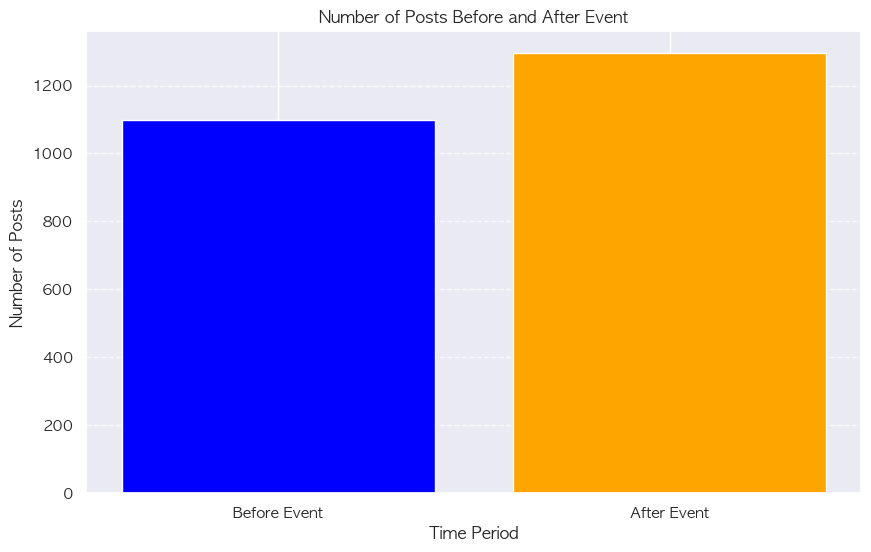

In [11]:
# 도서관 개관 전 후 데이터 개수 계산
pre_event_count = len(pre_event)
post_event_count = len(post_event)

# 데이터 개수 시각화
plt.figure(figsize=(10, 6))
plt.bar(['Before Event', 'After Event'], [pre_event_count, post_event_count], color=['blue', 'orange'])
plt.xlabel('Time Period')
plt.ylabel('Number of Posts')
plt.title('Number of Posts Before and After Event')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


도서관 개관 후 도서관에 대한 관심이 많아졌다. 

## 도서관 개관 전 후 키워드 빈도 비교 분석

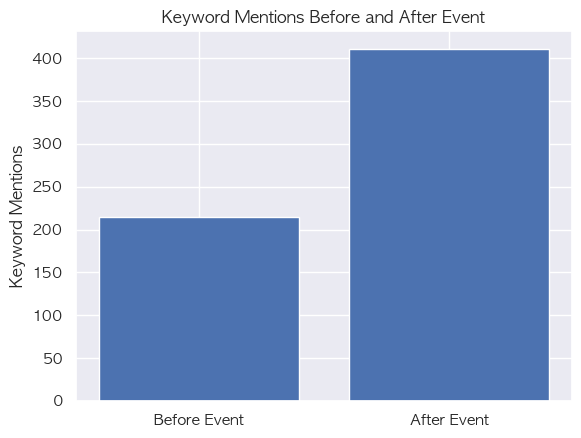

In [12]:
# 주요 키워드(by 워드클라우드)
keywords = ['자리', '노트북', '이용', '발권', '반납']

# 이벤트 전후 키워드 빈도 비교
keyword_counts_pre = pre_event['내용'].apply(lambda x: sum(keyword in x for keyword in keywords)).sum()
keyword_counts_post = post_event['내용'].apply(lambda x: sum(keyword in x for keyword in keywords)).sum()

# 키워드 빈도 비교 시각화
plt.bar(['Before Event', 'After Event'], [keyword_counts_pre, keyword_counts_post])
plt.ylabel('Keyword Mentions')
plt.title('Keyword Mentions Before and After Event')
plt.show()


도서관 개관 후, 주요 키워드에 대한 게시글이 늘어났다. 

## 도서관 개관일 이후 게시글 감정 변화

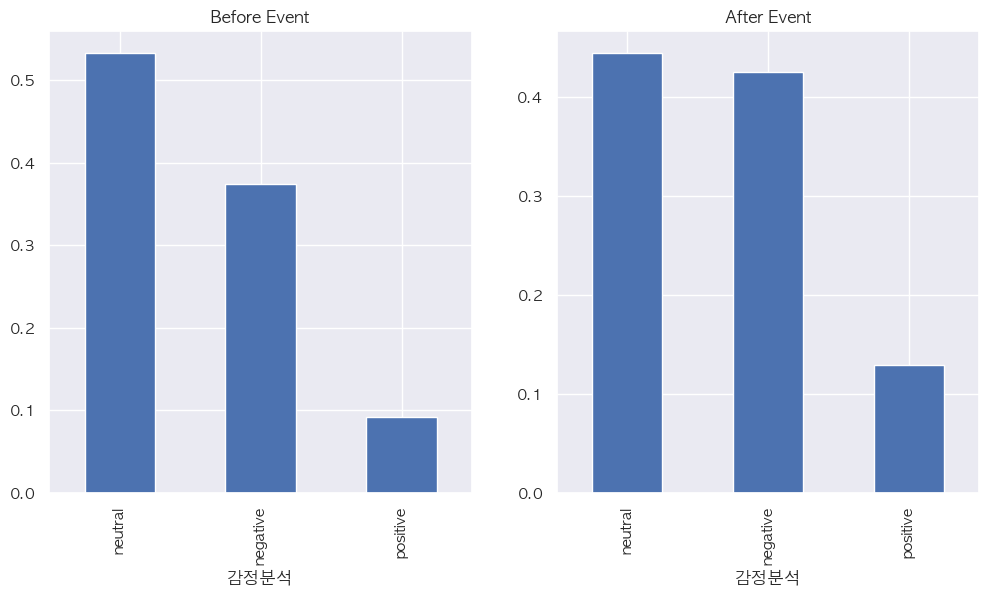

In [13]:
# 감정 분포 비교
pre_event_emotions = pre_event['감정분석'].value_counts(normalize=True)
post_event_emotions = post_event['감정분석'].value_counts(normalize=True)

# 감정 분포 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pre_event_emotions.plot(kind='bar', ax=ax[0], title='Before Event')
post_event_emotions.plot(kind='bar', ax=ax[1], title='After Event')
plt.show()

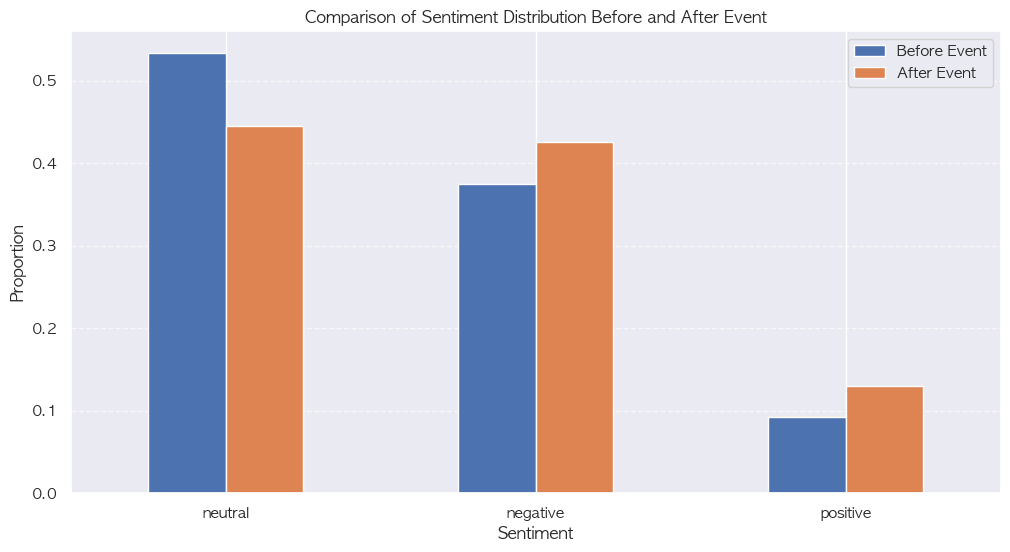

In [14]:
# 감정 분포 합치기
emotion_df = pd.DataFrame({
    'Before Event': pre_event_emotions,
    'After Event': post_event_emotions
}).fillna(0)  # NaN 값을 0으로 대체

# 감정 분포 시각화
emotion_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Sentiment Distribution Before and After Event')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 도서관 개관일 이후 키워드가 포함된 게시글 감정 변화

In [32]:
# Filter rows that contain any of the keywords
keywords = ['자리', '노트북', '이용', '발권', '반납']
keyword_filtered_df = df_sentiment[df_sentiment['내용'].apply(lambda x: any(keyword in x for keyword in keywords))]

# 날짜를 datetime 형식으로 변환
keyword_filtered_df['날짜'] = pd.to_datetime(keyword_filtered_df['날짜'], errors='coerce')

# 이벤트 발생일 설정
event_date = pd.to_datetime('2022-10-13')

# 이벤트 전후로 데이터 분할
pre_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] < event_date]
post_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] >= event_date]

# 감정 분포 비교
pre_event_emotions_keyword = pre_event_keyword['감정분석'].value_counts(normalize=True)
post_event_emotions_keyword = post_event_keyword['감정분석'].value_counts(normalize=True)


/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_14874/3907901912.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_filtered_df['날짜'] = pd.to_datetime(keyword_filtered_df['날짜'], errors='coerce')


In [16]:
pre_event_emotions_keyword

감정분석
neutral     0.598930
negative    0.342246
positive    0.058824
Name: proportion, dtype: float64

In [17]:
post_event_emotions_keyword

감정분석
negative    0.492212
neutral     0.420561
positive    0.087227
Name: proportion, dtype: float64

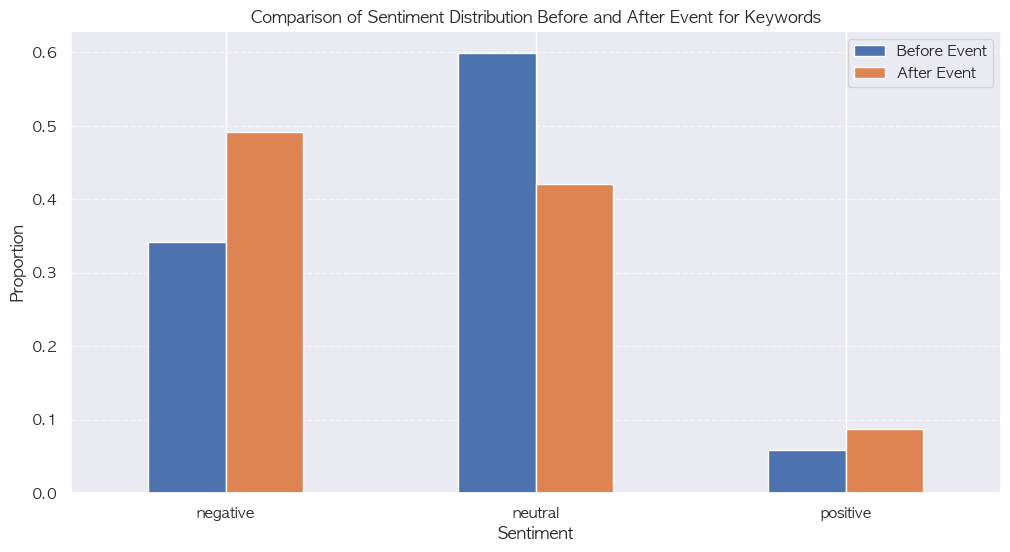

In [18]:
# 감정 분포 합치기
emotion_df_keyword = pd.DataFrame({
    'Before Event': pre_event_emotions_keyword,
    'After Event': post_event_emotions_keyword
}).fillna(0)  # NaN 값을 0으로 대체

# 감정 분포 시각화
emotion_df_keyword.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Sentiment Distribution Before and After Event for Keywords')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

키워드가 포함된 게시글에 대해서 도서관 개관 후, 
- 부정 : 크게 증가
- 중립 : 크게 감소
- 긍정 : 소폭 증가

/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_14874/1995843197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_filtered_df['월'] = keyword_filtered_df['날짜'].dt.to_period('M')


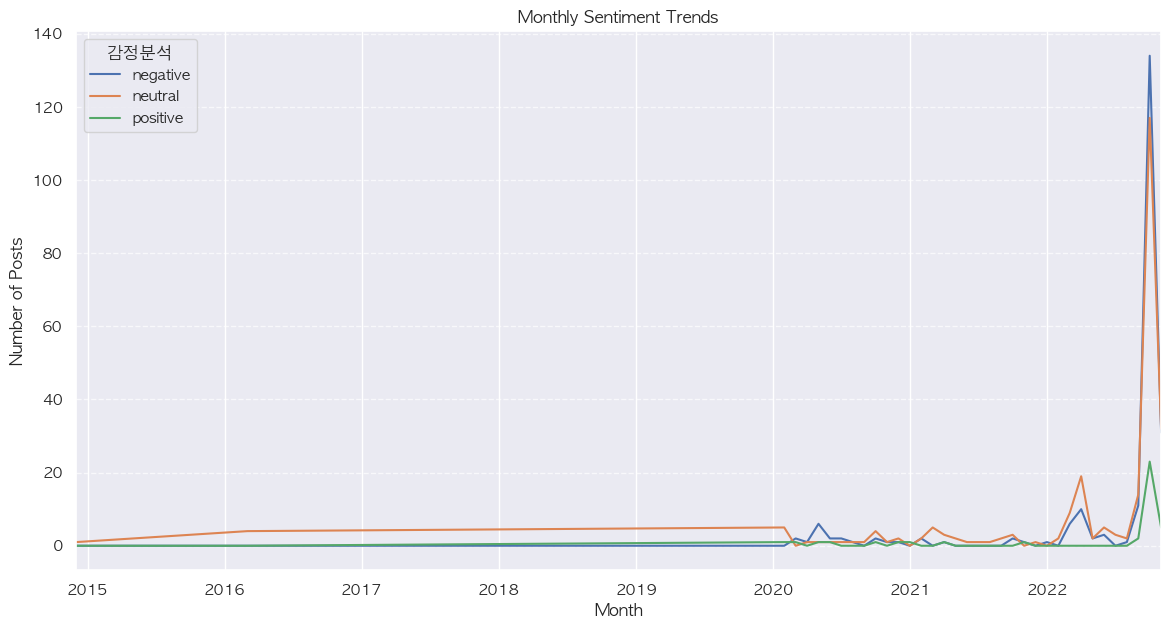

In [21]:
# 월별 감정 변화 추이
keyword_filtered_df['월'] = keyword_filtered_df['날짜'].dt.to_period('M')
monthly_emotions = keyword_filtered_df.groupby(['월', '감정분석']).size().unstack().fillna(0)

# 감정 변화 시각화
monthly_emotions.plot(kind='line', figsize=(14, 7))
plt.title('Monthly Sentiment Trends')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 도서관 개관 후 키워드가 포함된 게시글 감정별 평균 좋아요 수

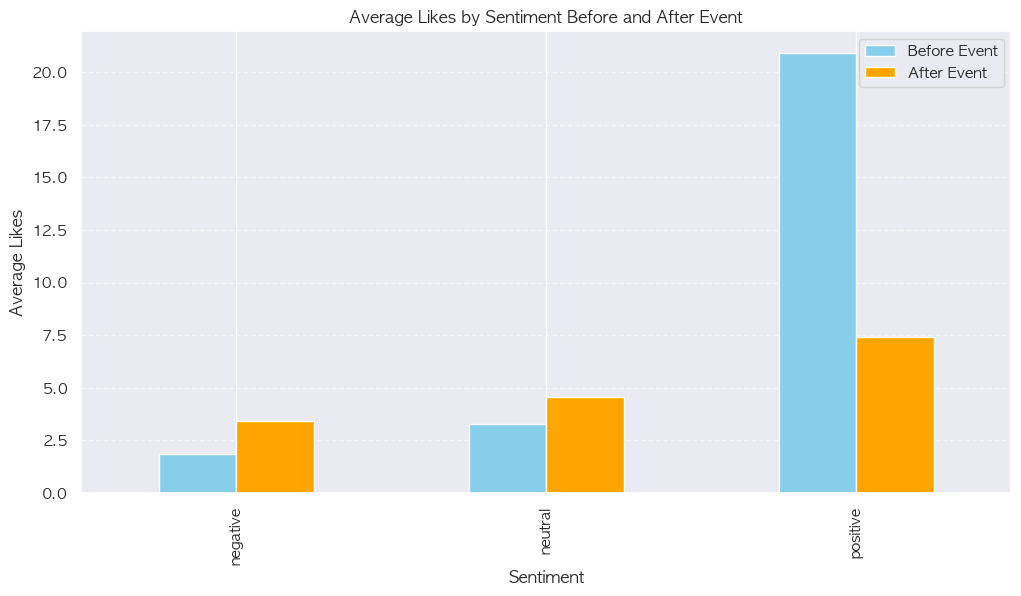

In [23]:
# 이벤트 전후로 데이터 분할
pre_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] < event_date]
post_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] >= event_date]

# 이벤트 전후 감정별 평균 좋아요 수 계산
pre_event_emotion_likes = pre_event_keyword.groupby('감정분석')['좋아요'].mean().rename('Before Event')
post_event_emotion_likes = post_event_keyword.groupby('감정분석')['좋아요'].mean().rename('After Event')

# 이벤트 전후 감정별 평균 좋아요 수 데이터프레임 병합
emotion_likes_comparison = pd.concat([pre_event_emotion_likes, post_event_emotion_likes], axis=1).fillna(0)

# 감정과 좋아요 수의 관계 시각화
emotion_likes_comparison.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Average Likes by Sentiment Before and After Event')
plt.xlabel('Sentiment')
plt.ylabel('Average Likes')
plt.legend(['Before Event', 'After Event'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


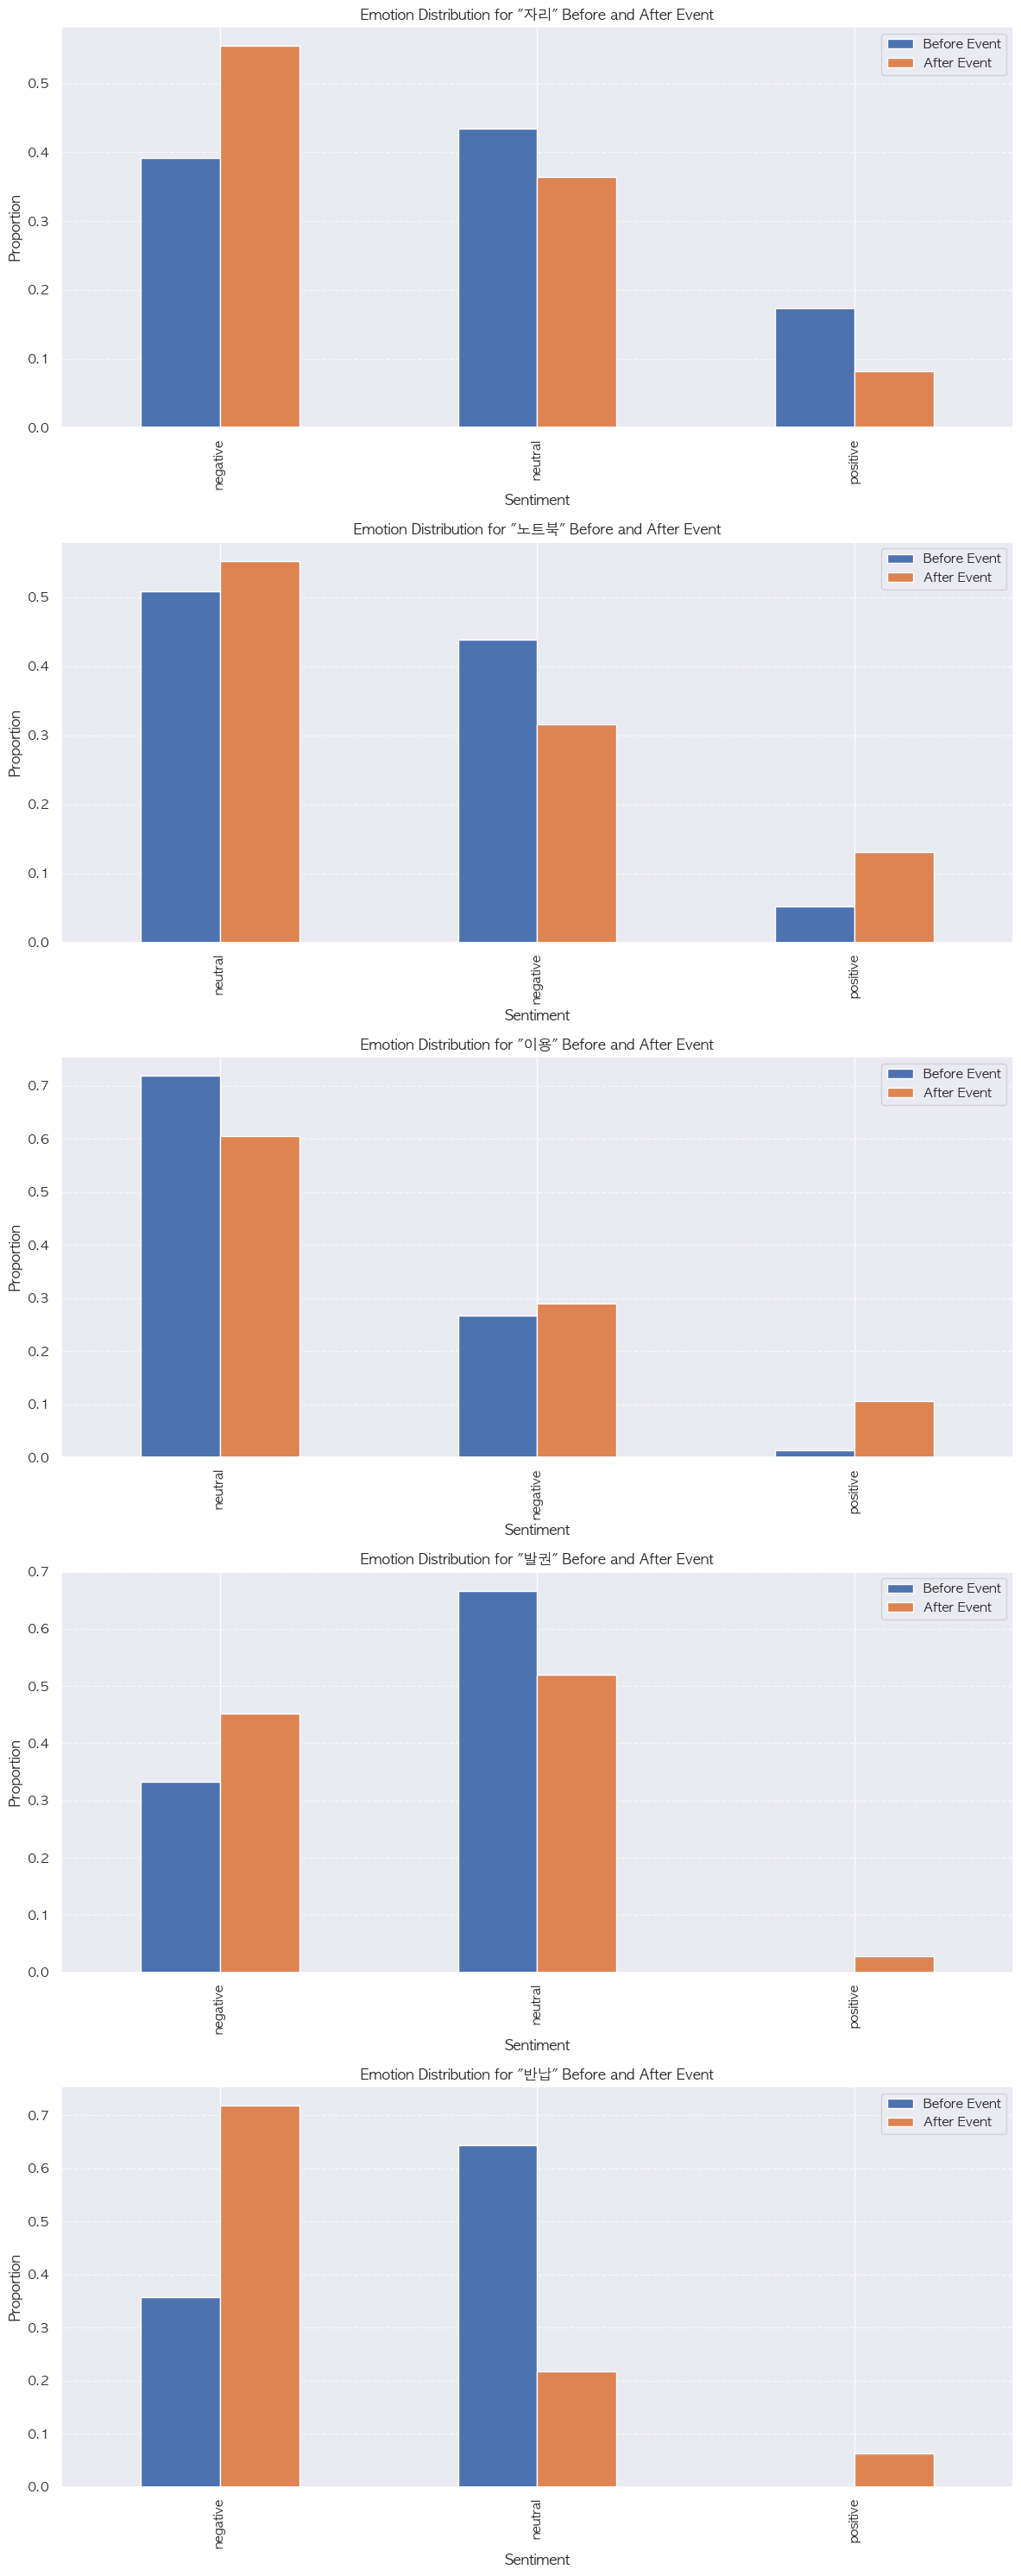

In [51]:
# 각 키워드별로 이벤트 전후의 감정 분포를 확인
keyword_emotion_distribution = {}

for keyword in keywords:
    pre_event_emotions_keyword = pre_event_keyword[pre_event_keyword['내용'].str.contains(keyword)]['감정분석'].value_counts(normalize=True)
    post_event_emotions_keyword = post_event_keyword[post_event_keyword['내용'].str.contains(keyword)]['감정분석'].value_counts(normalize=True)
    keyword_emotion_distribution[keyword] = pd.DataFrame({
        'Before Event': pre_event_emotions_keyword,
        'After Event': post_event_emotions_keyword
    }).fillna(0)

# 시각화
fig, axes = plt.subplots(len(keywords), 1, figsize=(12, 6 * len(keywords)))
if len(keywords) == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, keyword in zip(axes, keywords):
    keyword_emotion_distribution[keyword].plot(kind='bar', ax=ax, title=f'Emotion Distribution for "{keyword}" Before and After Event')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Proportion')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [34]:
keyword_filtered_df

,날짜,좋아요,내용,감정분석
0,NaT,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...,positive
5,2022-11-26 15:23:00,0,덕우들 도서관에서 빌린 책 28일에 반납 예정인데 기간 연장할 수 있어?,neutral
17,2022-11-25 02:05:00,0,도서관에서 과제하고 싶은데 엘지그램 키스킨x면 아무래도 에바지? 노트북존에서 사용하...,neutral
18,2022-11-24 22:03:00,0,도서관 1층 대출 반납쪽에 있는 선생님 중 한분 나만 불친절하다고 느끼나...,negative
20,2022-11-24 13:16:00,0,도서관 3층 독서실?자리는 예약 어떻게 해?,neutral
...,...,...,...,...
2361,2022-10-19 10:28:00,4,덕다 아침에 자리 맡아놓고 수업 다 갔다가 밤에 사람 젤많은 피크일 때 돌아오는 거...,negative
2364,2022-10-18 21:49:00,1,진짜 너무한다 덕다 개방형 자리에 짐 두고 나간지 개오래 됐는데 한 번을 안오네 ㅋ...,negative
2368,2022-10-17 20:47:00,0,덕다 꼭 써야하면 미발권으로 그냥 앉아있다가 누구 오면 비켜주는게 차라리 낫다 걍....,negative
2369,2022-10-17 19:11:00,3,덕다 몇시간동안 비어있는거 지켜봤고 정황상 미반납이라 발권 안 되는 거 같은 자리면...,negative


In [35]:
# 날짜를 datetime 형식으로 변환
keyword_filtered_df['날짜'] = pd.to_datetime(keyword_filtered_df['날짜'], errors='coerce')

# 이벤트 발생일 설정
event_date = pd.to_datetime('2022-10-13')

# 이벤트 전후로 데이터 분할
pre_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] < event_date]
post_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] >= event_date]

# 각 키워드별로 이벤트 전후의 감정 분포를 확인
keyword_emotion_distribution = []

for keyword in keywords:
    pre_event_emotions_keyword = pre_event_keyword[pre_event_keyword['내용'].str.contains(keyword)]['감정분석'].value_counts(normalize=True).rename('Before Event')
    post_event_emotions_keyword = post_event_keyword[post_event_keyword['내용'].str.contains(keyword)]['감정분석'].value_counts(normalize=True).rename('After Event')
    
    combined_emotions = pd.concat([pre_event_emotions_keyword, post_event_emotions_keyword], axis=1).fillna(0)
    combined_emotions['Keyword'] = keyword
    keyword_emotion_distribution.append(combined_emotions)

# 하나의 데이터프레임으로 합치기
emotion_df = pd.concat(keyword_emotion_distribution)
emotion_df


/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_14874/162714447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_filtered_df['날짜'] = pd.to_datetime(keyword_filtered_df['날짜'], errors='coerce')


,Before Event,After Event,Keyword
감정분석,,,
neutral,0.434783,0.364130,자리
negative,0.391304,0.554348,자리
positive,0.173913,0.081522,자리
neutral,0.508772,0.552632,노트북
negative,0.438596,0.315789,노트북
positive,0.052632,0.131579,노트북
neutral,0.718310,0.605263,이용
negative,0.267606,0.289474,이용
positive,0.014085,0.105263,이용


In [43]:
# 데이터프레임 재구성
emotion_df = emotion_df.melt(id_vars=['감정분석', 'Keyword'], value_vars=['Before Event', 'After Event'], var_name='Event', value_name='Proportion')

# '감정분석'을 'Sentiment'로 변경
emotion_df.rename(columns={'감정분석': 'Sentiment'}, inplace=True)
emotion_df

,Sentiment,Keyword,Event,Proportion
0,neutral,자리,Before Event,0.434783
1,negative,자리,Before Event,0.391304
2,positive,자리,Before Event,0.173913
3,neutral,노트북,Before Event,0.508772
4,negative,노트북,Before Event,0.438596
5,positive,노트북,Before Event,0.052632
6,neutral,이용,Before Event,0.718310
7,negative,이용,Before Event,0.267606
8,positive,이용,Before Event,0.014085
9,neutral,발권,Before Event,0.666667


In [53]:
emotion_df.to_csv('test.csv', index=False, encoding='utf-8-sig')

/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_14874/1914559379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Keyword', y='Proportion', hue='Event', data=emotion_df[emotion_df['Sentiment'] == sentiment], ax=ax, ci=None)
/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_14874/1914559379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Keyword', y='Proportion', hue='Event', data=emotion_df[emotion_df['Sentiment'] == sentiment], ax=ax, ci=None)
/var/folders/xs/f9fm_9vn3sn6nwbyrqy65ch40000gn/T/ipykernel_14874/1914559379.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Keyword', y='Proportion', hue='Event', data=emotion_df[emotion_df['Sentiment'] == sentiment], ax=ax, ci=None)


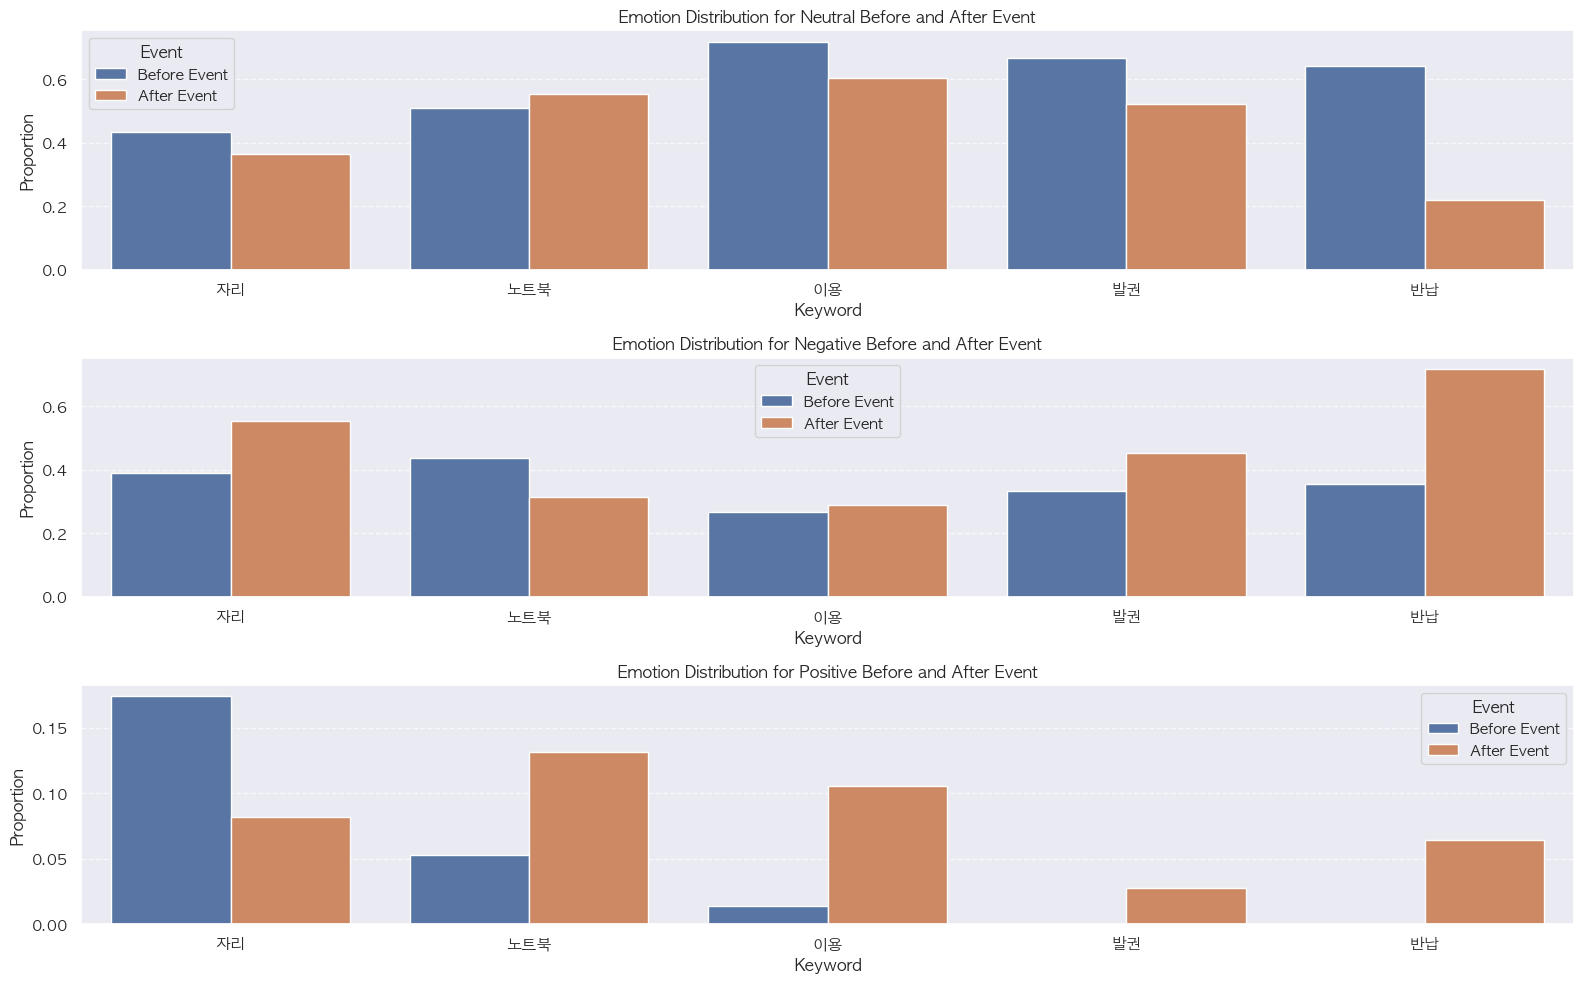

In [49]:
# 감정별로 그래프 그리기
sentiments = emotion_df['Sentiment'].unique()

fig, axes = plt.subplots(len(sentiments), 1, figsize=(16, 10))

for ax, sentiment in zip(axes, sentiments):
    sns.barplot(x='Keyword', y='Proportion', hue='Event', data=emotion_df[emotion_df['Sentiment'] == sentiment], ax=ax, ci=None)
    ax.set_title(f'Emotion Distribution for {sentiment.capitalize()} Before and After Event')
    ax.set_xlabel('Keyword')
    ax.set_ylabel('Proportion')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()